In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib notebook

In [2]:
df = pd.read_csv('climate_series.csv', sep=None, engine='python')

In [3]:
df.head()

,time,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,djf,mam,jja,son,winter,summer,year
0,1864,-7.10,-4.52,0.04,2.11,7.43,9.48,12.37,10.95,8.59,3.50,-0.51,-4.47,NaN,3.19,10.93,3.86,NaN,8.49,3.16
1,1865,-3.47,-6.25,-5.91,7.03,10.09,10.98,13.99,11.16,11.90,5.19,1.26,-3.07,-4.73,3.74,12.04,6.12,-2.85,10.86,4.41
2,1866,-1.31,-0.42,-1.00,4.11,4.95,12.02,12.25,9.98,9.70,5.34,-0.20,-0.49,-1.60,2.69,11.42,4.95,0.11,8.84,4.58
3,1867,-3.87,0.56,-0.13,3.49,7.74,10.57,11.29,12.93,10.43,2.92,-1.43,-5.80,-1.27,3.70,11.60,3.97,0.20,9.41,4.06
4,1868,-5.46,-1.53,-2.30,2.33,12.04,11.97,12.89,12.50,11.12,4.76,-1.98,1.27,-4.26,4.02,12.45,4.63,-2.27,10.47,4.80


<IPython.core.display.Javascript object>


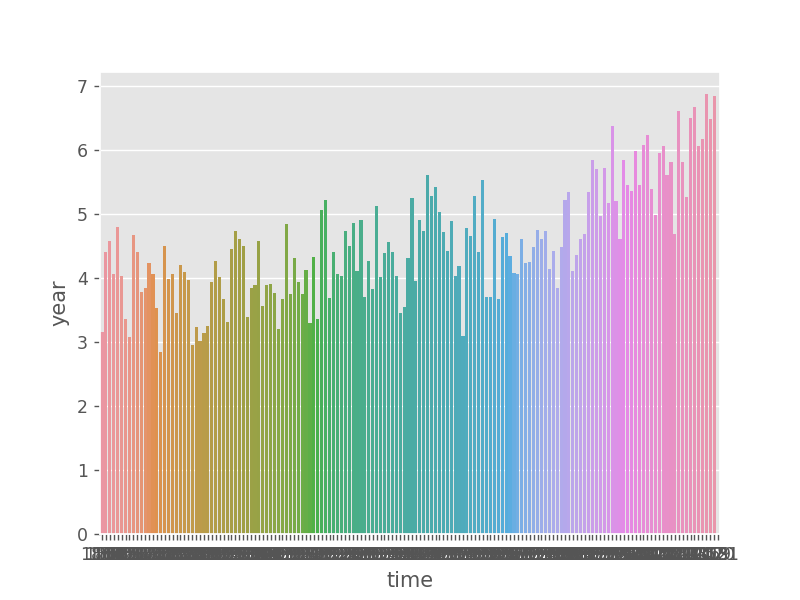

In [4]:
fig, ax = plt.subplots()
__ = sns.barplot(data=df, x='time', y='year', ax=ax)

## normalise to mean reference period (1961 - 1990)

In [5]:
reference_mean = df[df.time.isin(np.arange(1961, 1991))].year.mean()

In [6]:
df = df.assign(ref=reference_mean)

In [7]:
df = df.assign(difference=df.year - df.ref)

<IPython.core.display.Javascript object>


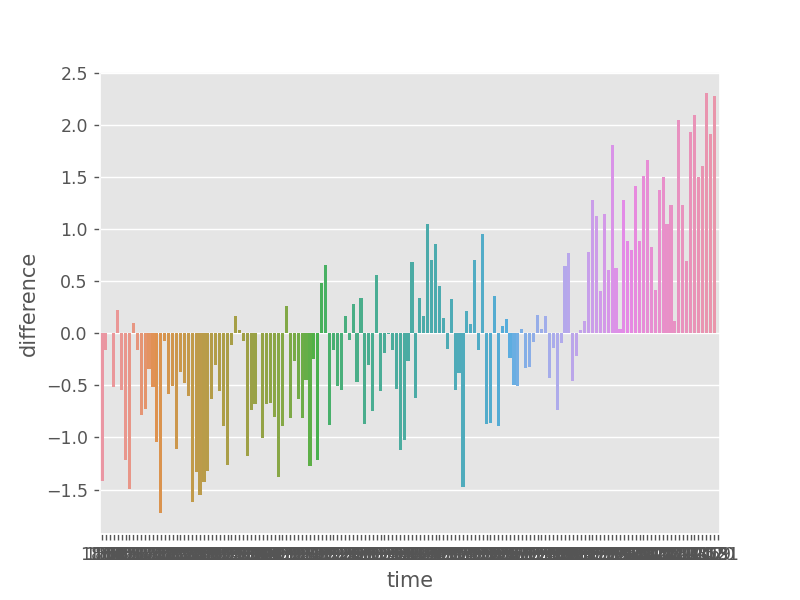

In [27]:
fig, ax = plt.subplots()
__ = sns.barplot(data=df, x='time', y='difference',  ax=ax)#, hue='difference',palette='bwr')

not in the right color palette for it to appear as the obvious climate stripes (with hue and colormap, firstly the plotting takes forever and second I cannot turn off the legend, barplot does not seem to recognise the legend=False :-/)  
anyway, I wanted the numbers to put into sonic pi

In [47]:
climate_series = df.difference

In [48]:
print(climate_series)

0     -1.414667
1     -0.164667
2      0.005333
3     -0.514667
4      0.225333
         ...   
153    1.605333
154    2.305333
155    1.915333
156    2.275333
157         NaN
Name: difference, Length: 158, dtype: float64


to convert these numbers to music in sonic pi, I need to make sure they are all positive, and I would like to fit them int othe range between 20 and 120

In [49]:
climate_series_for_sonic = np.interp(climate_series, (climate_series.min(), climate_series.max()), (20, 120))

In [51]:
df = df.assign(sonic=climate_series_for_sonic)

<IPython.core.display.Javascript object>


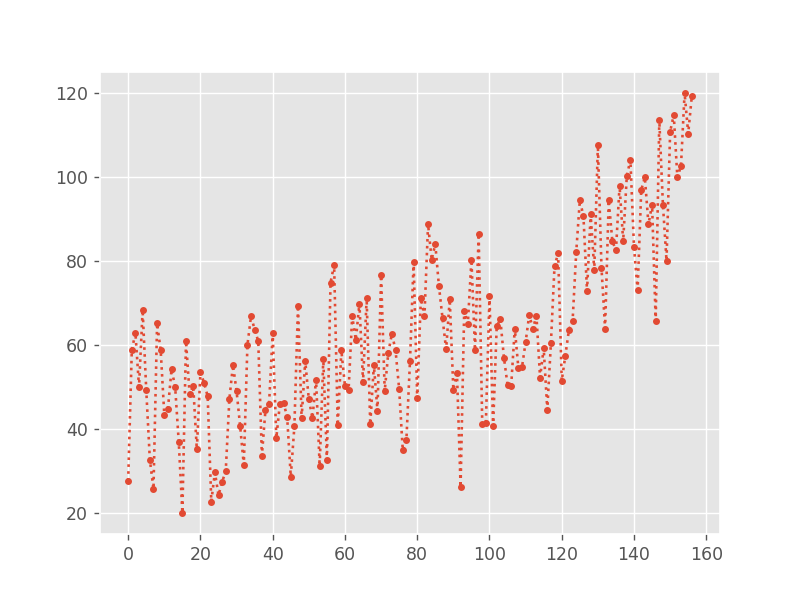

In [42]:
fig, ax = plt.subplots()
ax.plot(climate_series_for_sonic, '.:')

In [55]:
climate_series_for_sonic.round(2)

array([ 27.69,  58.71,  62.93,  50.02,  68.39,  49.28,  32.66,  25.71,
        65.16,  58.71,  43.33,  44.81,  54.24,  50.02,  36.87,  20.  ,
        60.94,  48.29,  50.27,  35.14,  53.5 ,  51.02,  47.79,  22.73,
        29.68,  24.22,  27.44,  29.93,  47.05,  55.24,  49.03,  40.6 ,
        31.41,  59.95,  66.9 ,  63.67,  60.94,  33.65,  44.57,  46.05,
        62.93,  37.87,  46.05,  46.3 ,  42.83,  28.68,  40.6 ,  69.38,
        42.58,  56.23,  47.05,  42.58,  51.76,  31.17,  56.72,  32.66,
        74.84,  79.06,  40.84,  58.71,  50.27,  49.28,  66.9 ,  61.19,
        69.88,  51.27,  71.12,  41.09,  55.24,  44.32,  76.58,  49.03,
        58.21,  62.68,  58.71,  49.53,  34.89,  37.37,  56.23,  79.8 ,
        47.3 ,  71.12,  66.9 ,  88.73,  80.3 ,  84.02,  74.09,  66.4 ,
        58.96,  70.87,  49.28,  53.25,  26.2 ,  68.14,  64.91,  80.3 ,
        58.71,  86.5 ,  41.09,  41.34,  71.61,  40.6 ,  64.42,  66.15,
        56.97,  50.52,  50.27,  63.92,  54.49,  54.74,  60.69,  67.15,
      

need to manually deal with the '20.' and '120.' when copying the data into sonic pi - either remove decimal point or add decimal digit